<a href="https://colab.research.google.com/github/vishnuvardhanreddychallapalli/Named-Entity-Recognition/blob/master/NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acquring Training Data and Test Data

```
# This is formatted as code
```



In [0]:
def get_data_and_labels(filename,is_train):
    my_data=[]
    my_labels=[]
    curr_label=[]
    curr_sent=[]
    with open(filename) as f:
        for eachline in f:
            if len(eachline.strip())==0:
                #print("length of line ={} and sent={}".format(len(eachline),eachline))
                if(is_train):
                    my_data.append(" ".join(curr_sent))
                    my_labels.append(curr_label)
                else:
                    my_data.append(" ".join(curr_sent))
                curr_label=[]
                curr_sent=[]
            else:
                my_keys=eachline.strip().split("\t")
                #print(my_keys)
                if(is_train):
                    curr_sent.append(my_keys[0])
                    curr_label.append(my_keys[1])
                else:
                    curr_sent.append(my_keys[0])
    if is_train:
        return my_data,my_labels
    else:
        return my_data

In [0]:
train_data,train_labels=get_data_and_labels('train.txt',True)

In [0]:
test_data=get_data_and_labels('test.txt',False)

In [4]:
len(train_data),len(train_labels)

(3395, 3395)

In [5]:
len(test_data)

1287

In [6]:
train_data[78]

"Lindsay Lohan allegedly failed her drug test . So not fetch . Quick , let 's all put on our shocked faces that 23 days of rehab did n't work !"

In [7]:
counter=dict()
for each_list in train_labels:
  curr_list=each_list
  for each_label in each_list:
    if counter.get(each_label)==None:
      counter[each_label]=1
    else:
      counter[each_label]+=1
counter

{'B-corporation': 221,
 'B-creative-work': 140,
 'B-group': 264,
 'B-location': 548,
 'B-person': 660,
 'B-product': 142,
 'I-corporation': 46,
 'I-creative-work': 206,
 'I-group': 150,
 'I-location': 245,
 'I-person': 335,
 'I-product': 203,
 'O': 59570}

In [8]:
import numpy as np
total=0
for val in counter.values():
  total+=val
total

62730

In [0]:
# Check how long sentences are so that we can pad them
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

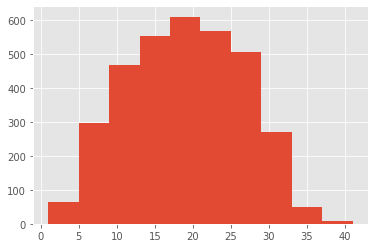

In [10]:
plt.hist([len(s.split(" ")) for s in train_data])
plt.show()

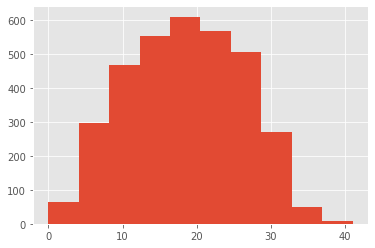

In [11]:
plt.hist([len(s) for s in train_labels])
plt.show()

In [12]:
for i in range(len(train_data)):
  if len(train_data[i].split(" "))!=len(train_labels[i]):
      print(train_data[i])
      print(train_labels[i])


[]


In [13]:
maxlen = max([len(s.split(" ")) for s in train_data])
print ('Maximum sequence length:', maxlen)

Maximum sequence length: 41


In [0]:
max_len=-1
max_sent=""
for eachsent in train_data:
    if len(eachsent.split(" "))>max_len:
        max_len=len(eachsent.split(" "))
        max_sent=eachsent

In [15]:
max_len,max_sent

(41,
 're : re : re : re : re : re : re : re : re : re : re : re : Esther Sikkimese is now following me on Twitter ! http://t.co/Z58brwgxFp Thanks a bunch ! 103 January ...')

Convert each-word into unique number in training data..

In [0]:
def get_unique_tokens(data):
    unique_words=set()
    for each_data_point in data:
        #print(each_data_point)
        for each_word in each_data_point.split(" "):
            unique_words.add(each_word)
    return list(unique_words)

In [0]:
def get_unique_labels(data):
    unique_labels=set()
    for each_label in data:
      curr_label=each_label
      for each_label_point in curr_label:
          unique_labels.add(each_label_point)
    return list(unique_labels)

In [0]:
unique_train_tokens=get_unique_tokens(train_data)

In [0]:
unique_train_labels=get_unique_labels(train_labels)

In [20]:
len(unique_train_tokens),len(unique_train_labels)

(14879, 13)

In [21]:
unique_train_labels

['I-creative-work',
 'I-group',
 'B-location',
 'I-location',
 'I-product',
 'O',
 'B-group',
 'B-person',
 'B-corporation',
 'I-person',
 'I-corporation',
 'B-creative-work',
 'B-product']

In [0]:
dict_of_word2idx = {w: i for i, w in enumerate(unique_train_tokens)}
dict_of_tag2idx = {t: i for i, t in enumerate(unique_train_labels)}
dict_of_idx2word= {i:w for i,w in enumerate(unique_train_tokens)}
dict_of_idx2tag=  {i:t for i,t in enumerate(unique_train_labels)}

In [23]:
dict_of_tag2idx

{'B-corporation': 8,
 'B-creative-work': 11,
 'B-group': 6,
 'B-location': 2,
 'B-person': 7,
 'B-product': 12,
 'I-corporation': 10,
 'I-creative-work': 0,
 'I-group': 1,
 'I-location': 3,
 'I-person': 9,
 'I-product': 4,
 'O': 5}

In [0]:
total_unique_words=len(dict_of_word2idx)
dict_of_word2idx['NA']=total_unique_words
dict_of_idx2word[total_unique_words]='NA'

In [25]:
len(dict_of_word2idx),len(dict_of_idx2word)

(14880, 14880)

In [26]:
from keras.preprocessing.sequence import pad_sequences
X_train = [[dict_of_word2idx[w] for w in s.split(" ")] for s in train_data]

Using TensorFlow backend.


In [0]:
X_train = pad_sequences(maxlen=48, sequences=X_train, padding="post",value=len(dict_of_word2idx))

In [28]:
X_train[0],len(train_data[0].split(" "))

(array([ 4802, 13965,  5334,  9430,  1959,  7158,  7084,  2118, 14547,
         5739,  7091, 13049,  8743, 13816,  5559,  6989,  5733,  9633,
         6893, 13816,  6442, 11769,  2432,  7301,  9595,  1641, 13816,
        14880, 14880, 14880, 14880, 14880, 14880, 14880, 14880, 14880,
        14880, 14880, 14880, 14880, 14880, 14880, 14880, 14880, 14880,
        14880, 14880, 14880], dtype=int32), 27)

In [29]:
dict_of_idx2word[14879]

'NA'

In [0]:
y_train = [[dict_of_tag2idx[w] for w in s] for s in train_labels]

In [31]:
y_train[0],train_labels[0]

([5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  3,
  5,
  2,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-location',
  'I-location',
  'I-location',
  'O',
  'B-location',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'])

In [0]:
y_train = pad_sequences(maxlen=48, sequences=y_train, padding="post", value=dict_of_tag2idx["O"])

In [33]:
y_train[0]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 3, 5, 2, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5], dtype=int32)

In [34]:
num_classes=len(dict_of_tag2idx)
num_classes

13

In [0]:
import numpy as np

In [0]:
from keras.utils import to_categorical
y_train1 = np.array([to_categorical(i, num_classes=num_classes) for i in y_train])

In [37]:
y_train.shape

(3395, 48)

In [38]:
y_train1.shape

(3395, 48, 13)

In [39]:
X_train.shape

(3395, 48)

In [0]:
X_test = [[dict_of_word2idx[w] if dict_of_word2idx.get(w)!=None else dict_of_word2idx['NA']  for w in s.split(" ")] for s in test_data]

In [0]:
X_test=pad_sequences(maxlen=64, sequences=X_test, padding="post",value=len(dict_of_word2idx))

In [42]:
X_test[0]

array([14879, 14879,  3304, 12737, 11516, 14879,  5656,  2753,  7575,
        3948, 14879, 11040,  8904, 14879, 14879,  6765,  9430, 14879,
        5654,  7076, 14879, 11499,  8355,  4474, 14879, 14879, 13816,
       14880, 14880, 14880, 14880, 14880, 14880, 14880, 14880, 14880,
       14880, 14880, 14880, 14880, 14880, 14880, 14880, 14880, 14880,
       14880, 14880, 14880, 14880, 14880, 14880, 14880, 14880, 14880,
       14880, 14880, 14880, 14880, 14880, 14880, 14880, 14880, 14880,
       14880], dtype=int32)

In [43]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
import keras as K
!pip install git+https://www.github.com/keras-team/keras-contrib.git
from keras_contrib.layers import CRF

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-2wq0janh
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-2wq0janh
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101065 sha256=095ebb3380c6d820f7d660e44557d039e6c79593c8d5e117b77dbabab25a0dba
  Stored in directory: /tmp/pip-ephem-wheel-cache-7jcw_jgc/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [0]:
weights=dict()
for each_tag in dict_of_idx2tag.keys():
  curr_tag=dict_of_idx2tag[each_tag]
  num=counter[curr_tag]
  weights[each_tag]=total/num

In [45]:
weights

{0: 304.5145631067961,
 1: 418.2,
 2: 114.47080291970804,
 3: 256.0408163265306,
 4: 309.01477832512313,
 5: 1.0530468356555314,
 6: 237.61363636363637,
 7: 95.04545454545455,
 8: 283.84615384615387,
 9: 187.2537313432836,
 10: 1363.695652173913,
 11: 448.07142857142856,
 12: 441.76056338028167}

In [46]:
input = Input(shape=(48,))
model = Embedding(input_dim=len(dict_of_word2idx)+1, output_dim=42, input_length=48)(input)
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=200, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(len(dict_of_tag2idx), activation="softmax"))(model)  # softmax output layer





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model = Model(input, out)

In [48]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 48, 42)            625002    
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 42)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 48, 400)           388800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 48, 13)            5213      
Total params: 1,019,015
Trainable params: 1,019,015
Non-trainable params: 0
_________________________________________________________________


In [49]:
!pip install seqeval
from seqeval.callbacks import F1Metrics

  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=5a18f3f59c321151f6fef10c670953374b4ae1d44e566afa07234a57d4be4e10
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
Successfully built seqeval


In [0]:
adam = K.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
#model.compile(optimizer=adam, loss=crf.loss_function, metrics=[crf.accuracy, 'accuracy'])
#model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
# Saving the best only
from keras.callbacks import ModelCheckpoint
filepath="best_model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
dict_of_idx2tag=  {i:t for i,t in enumerate(unique_train_labels)}
callbacks_list = [checkpoint,F1Metrics(dict_of_idx2tag)]

In [52]:
dict_of_idx2tag

{0: 'I-creative-work',
 1: 'I-group',
 2: 'B-location',
 3: 'I-location',
 4: 'I-product',
 5: 'O',
 6: 'B-group',
 7: 'B-person',
 8: 'B-corporation',
 9: 'I-person',
 10: 'I-corporation',
 11: 'B-creative-work',
 12: 'B-product'}

In [58]:
history = model.fit(X_train, y_train1, batch_size=64, epochs=10, validation_split=0.2, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 2716 samples, validate on 679 samples
Epoch 1/10





2716/2716 [==============================] - 16s 6ms/step - loss: 0.8527 - acc: 0.9576 - val_loss: 0.1460 - val_acc: 0.9796
Epoch 2/10
2716/2716 [==============================] - 13s 5ms/step - loss: 0.1397 - acc: 0.9809 - val_loss: 0.1330 - val_acc: 0.9796
Epoch 3/10
2716/2716 [==============================] - 13s 5ms/step - loss: 0.1249 - acc: 0.9809 - val_loss: 0.1268 - val_acc: 0.9796
Epoch 4/10
2716/2716 [==============================] - 13s 5ms/step - loss: 0.1205 - acc: 0.9809 - val_loss: 0.1256 - val_acc: 0.9796
Epoch 5/10
2716/2716 [==============================] - 13s 5ms/step - loss: 0.1174 - acc: 0.9809 - val_loss: 0.1251 - val_acc: 0.9796
Epoch 6/10
2716/2716 [==============================] - 13s 5ms/step - loss: 0.1138 - acc: 0.9809 - val_loss: 0.1243 - val_acc: 0.9796
Epoch 7/10
2716/2716 [===================

In [59]:
test_data[0]

'& gt ; * The soldier was killed when another avalanche hit an army barracks in the northern area of Sonmarg , said a military spokesman .'

In [60]:
i = 249
p = model.predict(np.array([X_train[i]]))
p = np.argmax(p, axis=-1)
true=np.argmax(y_train[i],axis=-1)
print(X_test[i])
print(true)
print(p)

[ 6409 12518 14879 11499 11716  1302 14879 12518 13837  6765 14879 13816
 14880 14880 14880 14880 14880 14880 14880 14880 14880 14880 14880 14880
 14880 14880 14880 14880 14880 14880 14880 14880 14880 14880 14880 14880
 14880 14880 14880 14880 14880 14880 14880 14880 14880 14880 14880 14880
 14880 14880 14880 14880 14880 14880 14880 14880 14880 14880 14880 14880
 14880 14880 14880 14880]
0
[[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  5 5 5 5 5 5 5 5 5 5 5 5]]
